# Flip Robo Technologies Web Scraping - Assignment - 3

## Solved by Mihir Bhoite - Batch - DS2406

#### Question -1   Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

In [157]:
import requests
from bs4 import BeautifulSoup

In [158]:
# Function to search for products on Amazon.in
def search_amazon_products(query):
    # Prepare the URL for Amazon India with search query
    base_url = "https://www.amazon.in/s?k="
    query = query.replace(' ', '+')  # Replace spaces with '+' for URL encoding
    url = base_url + query
    
    # Add headers to look like a legitimate browser request
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    
    # Send HTTP request to Amazon
    response = requests.get(url, headers=headers)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the page content
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find all product listings (Amazon uses classes like 'a-section a-spacing-medium')
        products = soup.find_all('div', {'class': 's-main-slot s-result-list s-search-results sg-row'})
        
        # Iterate and display product titles (Amazon frequently updates their classes)
        for product in products:
            product_name = product.find('span', {'class': 'a-size-medium a-color-base a-text-normal'})
            if product_name:
                print(product_name.text)
    else:
        print(f"Failed to retrieve results. Status code: {response.status_code}")

# Get user input
search_query = input("Enter the product you want to search for: ")

# Perform the search
search_amazon_products(search_query)


Enter the product you want to search for: Headphones
amazon basics TWS in-Ear Earbuds (AB-T10) with Fast Charging up to 50 Hours of Playtime | Dual 10mm Driver | IPX4 Water-Resistance | Bluetooth 5.3 | Charging Case with Mic | Touch Control (Black)


#### Question -2 In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [159]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to scrape product details from a single page
def scrape_amazon_page(soup):
    products = soup.find_all('div', {'data-component-type': 's-search-result'})
    product_list = []

    for product in products:
        # Extracting product details
        product_url_tag = product.find('a', {'class': 'a-link-normal a-text-normal'})
        product_url = 'https://www.amazon.in' + product_url_tag['href'] if product_url_tag else '-'
        
        product_name = product.find('span', {'class': 'a-size-base-plus a-color-base a-text-normal'})
        product_name = product_name.text if product_name else '-'
        
        brand = product.find('span', {'class': 'a-size-base-plus a-color-base'})
        brand = brand.text if brand else '-'
        
        price = product.find('span', {'class': 'a-price-whole'})
        price = price.text.replace(',', '') if price else '-'
        
        # Placeholder for details we cannot scrape directly (would require actual product page scraping)
        return_exchange = '-'
        expected_delivery = '-'
        availability = '-'
        
        product_list.append({
            'Brand Name': brand,
            'Product Name': product_name,
            'Price': price,
            'Return/Exchange': return_exchange,
            'Expected Delivery': expected_delivery,
            'Availability': availability,
            'Product URL': product_url
        })
        
    return product_list

# Function to scrape multiple pages
def search_amazon_products(query, max_pages=3):
    base_url = "https://www.amazon.in/s?k="
    query = query.replace(' ', '+')  # Replace spaces with '+' for URL encoding
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    
    all_products = []
    
    for page in range(1, max_pages + 1):
        url = base_url + query + f"&page={page}"
        response = requests.get(url, headers=headers)
        
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            
            # Check if there are any products on the page
            if soup.find_all('div', {'data-component-type': 's-search-result'}):
                all_products.extend(scrape_amazon_page(soup))
            else:
                break  # No more products, exit the loop
        else:
            print(f"Failed to retrieve page {page}. Status code: {response.status_code}")
            break

    return all_products

# Main function to run the scraper and save data to CSV
def main():
    # Get user input for the product search
    search_query = input("Enter the product you want to search for: ")
    
    # Scrape Amazon for the first 3 pages of the search results
    product_data = search_amazon_products(search_query, max_pages=3)
    
    # Save the scraped data into a DataFrame
    df = pd.DataFrame(product_data)
    print(df)
    
    # Save the DataFrame to CSV
    df.to_csv(f"{search_query}_amazon_products.csv", index=False)
    print(f"Data saved to {search_query}_amazon_products.csv")

# Run the main function
if __name__ == "__main__":
    main()


Enter the product you want to search for: Headphones
   Brand Name Product Name Price Return/Exchange Expected Delivery  \
0           -            -  1099               -                 -   
1           -            -   799               -                 -   
2           -            -   328               -                 -   
3           -            -  1498               -                 -   
4           -            -  1499               -                 -   
..        ...          ...   ...             ...               ...   
61          -            -  2799               -                 -   
62          -            -  1299               -                 -   
63          -            -  2799               -                 -   
64          -            -  8299               -                 -   
65          -            -  1499               -                 -   

   Availability Product URL  
0             -           -  
1             -           -  
2             - 

#### Question-3- Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.


Top 10 images for 'fruits':





https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSfXdjbHBJX06KUKN4tkfd8KFFDyYnIICCvDxYxgY3_0Plx7p71-aCeB-fp&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQJI-r9JDFn4sJnHXt76kL8lBBybGhtbRz3ArtMtSSGdocJlaSoA2sZPze4&s
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==

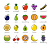
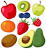
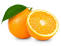
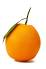
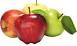


Top 10 images for 'cars':





https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTwqM2a8Zbso53YHmCDOkFkALarT5Jo8ac9Jd98gCjCtyUSFN9VRTgZY41e&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-qtWBa7NHBH0hAU0aApELB3AalJb8mCcYrK-UjT3m-MNX10VqKxF4uvsP&s
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==

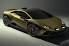
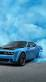
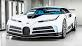
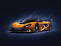
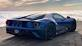


Top 10 images for 'Machine Learning':





https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQhW8ZdId5JwBCTF2B7_T5-Sp-jukv4og_RdHmPi5l1HvvdLYELmAah5_Li&s
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==

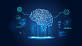
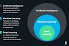
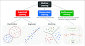
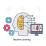
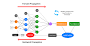


Top 10 images for 'Guitar':





https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQtxnB8qIZXjYWEA02qvst2alwk2v-YX0E14yRUhSg55wIiG9s1emtJuWPA&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTCQg4v_lNSUP700wmkNykQWFzZ6g45CkS-iVyZMuN3gNSewOo2KbkYUJJC&s
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==

Top 10 images for 'Cakes':





https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQnFN6e_ON9feWto9qPXNSjqtLHLNMpAuKJisqBMKBQyKQD2aadIZoZVGGu&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRSYZvebmIFDe9vcckc1TImQTsAFvZmbomC_Ow9vZJDNf1L4EOyGxNpggY9&s
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEA
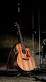
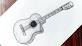
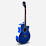
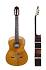
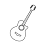
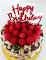
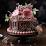
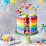
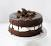
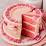

In [160]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Set up the Chrome driver (ensure you have ChromeDriver installed)
driver = webdriver.Chrome()

# Open images.google.com
driver.get('https://images.google.com')

# Define the search keywords
keywords = ['fruits', 'cars', 'Machine Learning', 'Guitar', 'Cakes']

for keyword in keywords:
    # Find the search bar element and enter the keyword
    search_bar = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.NAME, 'q')))
    search_bar.clear()
    search_bar.send_keys(keyword)
    search_bar.send_keys(Keys.RETURN)

    # Wait for the search results to load (CSS selector for image results)
    try:
        WebDriverWait(driver, 15).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'img.YQ4gaf')))
    except Exception as e:
        print(f"Failed to load results for {keyword}: {e}")
        continue

    # Scroll down multiple times to load more images
    for _ in range(5):  # Increase the range to load more images
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)  # Wait for images to load

    # Scrape the image URLs
    image_elements = driver.find_elements(By.CSS_SELECTOR, 'img.YQ4gaf')

    # Extract the image URLs (some images might not have 'src' and may have 'data-src')
    image_urls = []
    for element in image_elements:
        url = element.get_attribute('src') or element.get_attribute('data-src')
        if url:
            image_urls.append(url)

    # Print the first 10 image URLs for each keyword
    print(f"\nTop 10 images for '{keyword}':")
    for url in image_urls[:10]:
        print(url)

    # Wait before moving to the next keyword
    time.sleep(2)

# Close the browser
driver.quit()


#### Question-4 - Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. 
Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [209]:
driver = webdriver.Chrome()
site4="https://www.flipkart.com/search?q=smartphone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
driver.get(site4)

In [210]:
Brand_Name=[]
Colour=[]
Storage_RAM_ROM=[]
P_F_Camera=[]
Display_size_Resolution=[]
ProcessorAndCores=[]
Battery=[]
Price=[]
Product_URL=[]


In [211]:
#scraping the Brand_Name 
BName = driver.find_elements(By.XPATH, "//div[@class='KzDlHZ']")

for i in BName:
    if not i.text:
        Brand_Name.append("--")
    else:
        Brand_Name.append(i.text)

print(len(Brand_Name), Brand_Name)

24 ['itel Color Pro 5G (River Blue, 128 GB)', 'REDMI Note 13 Pro 5G (Coral Purple, 128 GB)', 'Motorola Edge 50 Pro 5G with 125W Charger (Luxe Lavender, 256 GB)', 'Motorola Edge 50 Fusion (Hot Pink, 256 GB)', 'REDMI Note 13 Pro 5G (Midnight Black, 128 GB)', 'REDMI Note 13 Pro 5G (Arctic White, 128 GB)', 'Motorola Edge 50 Fusion (Marshmallow Blue, 256 GB)', 'Motorola Edge 50 Pro 5G with 125W Charger (Black Beauty, 256 GB)', 'Motorola Edge 50 Fusion (Forest Green, 128 GB)', 'Motorola g45 5G (Brilliant Green, 128 GB)', 'vivo T3 Ultra (Lunar Gray, 128 GB)', 'realme P2 Pro 5G (Eagle Grey, 128 GB)', 'Motorola Edge 50 Fusion (Forest Green, 256 GB)', 'Motorola Edge 50 Fusion (Forest Blue, 128 GB)', 'Motorola Edge 50 Pro 5G with 125W Charger (Vanilla Cream, 256 GB)', 'Motorola Edge 50 Pro 5G with 125W Charger (Caneel Bay, 256 GB)', 'Motorola g45 5G (Brilliant Blue, 128 GB)', 'Motorola Edge 50 Fusion (Marshmallow Blue, 128 GB)', 'Motorola Edge 50 Fusion (Forest Blue, 256 GB)', 'Motorola Edge 50 F

In [212]:
# Scraping the RAM, Storage, and ROM information
ram = driver.find_elements(By.XPATH, "//ul[@class='G4BRas']//li[1]")
for i in ram:
    if not i.text:
        Storage_RAM_ROM.append("--") 
    else:
        Storage_RAM_ROM.append(i.text)

print(len(Storage_RAM_ROM), Storage_RAM_ROM)


24 ['6 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '8 GB RAM | 128 GB ROM', '12 GB RAM | 256 GB ROM', '12 GB RAM | 256 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '12 GB RAM | 256 GB ROM', '12 GB RAM | 256 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '12 GB RAM | 256 GB ROM', '8 GB RAM | 128 GB ROM', '12 GB RAM | 256 GB ROM', '12 GB RAM | 256 GB ROM', '8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '8 GB RAM | 128 GB ROM', '12 GB RAM | 256 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '6 GB RAM | 128 GB ROM | Expandable Upto 1 TB']


In [213]:
#scraping the P_F_Camera
PC = driver.find_elements(By.XPATH, "//ul[@class='G4BRas']//li[3]")
for i in PC:
    if not i.text:  # Check if the text is empty
        P_F_Camera.append("--") 
    else:
        P_F_Camera.append(i.text)

print(len(P_F_Camera), P_F_Camera)


24 ['50MP + 2MP | 8MP Front Camera', '200MP (OIS) + 8MP + 2MP | 16MP Front Camera', '50MP + 13MP + 10MP | 50MP Front Camera', '50MP + 13MP | 32MP Front Camera', '200MP (OIS) + 8MP + 2MP | 16MP Front Camera', '200MP (OIS) + 8MP + 2MP | 16MP Front Camera', '50MP + 13MP | 32MP Front Camera', '50MP + 13MP + 10MP | 50MP Front Camera', '50MP + 13MP | 32MP Front Camera', '50MP + 2MP | 16MP Front Camera', '50MP + 8MP | 50MP Front Camera', '50MP + 8MP | 32MP Front Camera', '50MP + 13MP | 32MP Front Camera', '50MP + 13MP | 32MP Front Camera', '50MP + 13MP + 10MP | 50MP Front Camera', '50MP + 13MP + 10MP | 50MP Front Camera', '50MP + 2MP | 16MP Front Camera', '50MP + 13MP | 32MP Front Camera', '50MP + 13MP | 32MP Front Camera', '50MP + 13MP | 32MP Front Camera', '50MP + 2MP | 16MP Front Camera', '50MP + 2MP | 16MP Front Camera', '50MP + 2MP | 16MP Front Camera', '50MP + 8MP + 2MP | 8MP Front Camera']


In [214]:
#scraping the Display_size_Resolution 
DS=driver.find_elements(By.XPATH, "//ul[@class='G4BRas']//li[2]")
for i in DS:
    if i.text is None :
        Display_size_Resolution.append("--") 
    else:
        Display_size_Resolution.append(i.text)
print(len(Display_size_Resolution),Display_size_Resolution)

24 ['16.76 cm (6.6 inch) HD+ Display', '16.94 cm (6.67 inch) Display', '17.02 cm (6.7 inch) Display', '17.02 cm (6.7 inch) Full HD+ Display', '16.94 cm (6.67 inch) Display', '16.94 cm (6.67 inch) Display', '17.02 cm (6.7 inch) Full HD+ Display', '17.02 cm (6.7 inch) Display', '17.02 cm (6.7 inch) Full HD+ Display', '16.51 cm (6.5 inch) HD+ Display', '17.22 cm (6.78 inch) Display', '17.02 cm (6.7 inch) Full HD+ Display', '17.02 cm (6.7 inch) Full HD+ Display', '17.02 cm (6.7 inch) Full HD+ Display', '17.02 cm (6.7 inch) Display', '17.02 cm (6.7 inch) Display', '16.51 cm (6.5 inch) HD+ Display', '17.02 cm (6.7 inch) Full HD+ Display', '17.02 cm (6.7 inch) Full HD+ Display', '17.02 cm (6.7 inch) Full HD+ Display', '16.51 cm (6.5 inch) HD+ Display', '16.51 cm (6.5 inch) HD+ Display', '16.51 cm (6.5 inch) HD+ Display', '17.25 cm (6.79 inch) Full HD+ Display']


In [215]:
#scraping the ProcessorAndCores 
P=driver.find_elements(By.XPATH, "//ul[@class='G4BRas']//li[5]")
for i in P:
    if i.text is None :
        ProcessorAndCores.append("--") 
    else:
        ProcessorAndCores.append(i.text)
print(len(ProcessorAndCores),ProcessorAndCores)

24 ['Dimensity 6080 Processor', '7s Gen 2 Mobile Platform 5G Processor', '7 Gen 3 Mobile Platform Processor', '7s Gen 2 Processor', '7s Gen 2 Mobile Platform 5G Processor', '7s Gen 2 Mobile Platform 5G Processor', '7s Gen 2 Processor', '7 Gen 3 Mobile Platform Processor', '7s Gen 2 Processor', 'Snapdragon 6s Gen 3 Processor', 'Dimensity 9200+ Processor', '7s Gen2 Processor', '7s Gen 2 Processor', '7s Gen 2 Processor', '7 Gen 3 Mobile Platform Processor', '7 Gen 3 Mobile Platform Processor', 'Snapdragon 6s Gen 3 Processor', '7s Gen 2 Processor', '7s Gen 2 Processor', '7s Gen 2 Processor', 'Snapdragon 6s Gen 3 Processor', 'Snapdragon 6s Gen 3 Processor', 'Snapdragon 6s Gen 3 Processor', 'Helio G88 Processor']


In [216]:
#scraping the Battery 
B=driver.find_elements(By.XPATH, "//ul[@class='G4BRas']//li[4]")
for i in B:
    if i.text is None :
        Battery.append("--") 
    else:
        Battery.append(i.text)
print(len(Battery),Battery)

24 ['5000 mAh Battery', '5100 mAh Battery', '4500 mAh Battery', '5000 mAh Battery', '5100 mAh Battery', '5100 mAh Battery', '5000 mAh Battery', '4500 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5500 mAh Battery', '5200 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '4500 mAh Battery', '4500 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery']


In [217]:
#scraping the Price 
price=driver.find_elements(By.XPATH, "//div[@class='Nx9bqj _4b5DiR']")
for i in price:
    if i.text is None :
        Price.append("--") 
    else:
        Price.append(i.text)
print(len(Price),Price)

24 ['₹9,999', '₹24,999', '₹35,999', '₹24,999', '₹24,999', '₹24,999', '₹24,999', '₹35,999', '₹22,999', '₹11,999', '₹31,999', '₹21,999', '₹24,999', '₹22,999', '₹35,999', '₹35,999', '₹11,999', '₹22,999', '₹24,999', '₹22,999', '₹11,999', '₹9,999', '₹9,999', '₹8,999']


In [218]:
FlipKart=pd.DataFrame([])
FlipKart['Brand_Name']=Brand_Name
FlipKart['Storage_RAM_ROM']=Storage_RAM_ROM
FlipKart['Amount P_F_Camera']=P_F_Camera
FlipKart['Display_size_Resolution']=Display_size_Resolution
FlipKart['ProcessorAndCores']=ProcessorAndCores
FlipKart['Battery']=Battery
FlipKart['Price']=Price

FlipKart

,Brand_Name,Storage_RAM_ROM,Amount P_F_Camera,Display_size_Resolution,ProcessorAndCores,Battery,Price
0,"itel Color Pro 5G (River Blue, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP + 2MP | 8MP Front Camera,16.76 cm (6.6 inch) HD+ Display,Dimensity 6080 Processor,5000 mAh Battery,"₹9,999"
1,"REDMI Note 13 Pro 5G (Coral Purple, 128 GB)",8 GB RAM | 128 GB ROM,200MP (OIS) + 8MP + 2MP | 16MP Front Camera,16.94 cm (6.67 inch) Display,7s Gen 2 Mobile Platform 5G Processor,5100 mAh Battery,"₹24,999"
2,Motorola Edge 50 Pro 5G with 125W Charger (Lux...,12 GB RAM | 256 GB ROM,50MP + 13MP + 10MP | 50MP Front Camera,17.02 cm (6.7 inch) Display,7 Gen 3 Mobile Platform Processor,4500 mAh Battery,"₹35,999"
3,"Motorola Edge 50 Fusion (Hot Pink, 256 GB)",12 GB RAM | 256 GB ROM,50MP + 13MP | 32MP Front Camera,17.02 cm (6.7 inch) Full HD+ Display,7s Gen 2 Processor,5000 mAh Battery,"₹24,999"
4,"REDMI Note 13 Pro 5G (Midnight Black, 128 GB)",8 GB RAM | 128 GB ROM,200MP (OIS) + 8MP + 2MP | 16MP Front Camera,16.94 cm (6.67 inch) Display,7s Gen 2 Mobile Platform 5G Processor,5100 mAh Battery,"₹24,999"
5,"REDMI Note 13 Pro 5G (Arctic White, 128 GB)",8 GB RAM | 128 GB ROM,200MP (OIS) + 8MP + 2MP | 16MP Front Camera,16.94 cm (6.67 inch) Display,7s Gen 2 Mobile Platform 5G Processor,5100 mAh Battery,"₹24,999"
6,"Motorola Edge 50 Fusion (Marshmallow Blue, 256...",12 GB RAM | 256 GB ROM,50MP + 13MP | 32MP Front Camera,17.02 cm (6.7 inch) Full HD+ Display,7s Gen 2 Processor,5000 mAh Battery,"₹24,999"
7,Motorola Edge 50 Pro 5G with 125W Charger (Bla...,12 GB RAM | 256 GB ROM,50MP + 13MP + 10MP | 50MP Front Camera,17.02 cm (6.7 inch) Display,7 Gen 3 Mobile Platform Processor,4500 mAh Battery,"₹35,999"
8,"Motorola Edge 50 Fusion (Forest Green, 128 GB)",8 GB RAM | 128 GB ROM,50MP + 13MP | 32MP Front Camera,17.02 cm (6.7 inch) Full HD+ Display,7s Gen 2 Processor,5000 mAh Battery,"₹22,999"
9,"Motorola g45 5G (Brilliant Green, 128 GB)",8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP + 2MP | 16MP Front Camera,16.51 cm (6.5 inch) HD+ Display,Snapdragon 6s Gen 3 Processor,5000 mAh Battery,"₹11,999"


#### Question-5-Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [219]:
driver = webdriver.Chrome()

In [222]:
import time
import re
from selenium.webdriver.common.by import By  # Ensure By is imported

# Opening Google Maps
driver.get("https://www.google.co.in/maps")
time.sleep(3)

city = input('Enter City Name : ')  # Enter city to be searched
search = driver.find_element(By.ID, "searchboxinput")  # locating search bar
search.clear()  # clearing search bar
time.sleep(2)
search.send_keys(city)  # entering values in search bar
button = driver.find_element(By.ID, "searchbox-searchbutton")  # locating search button
button.click()  # clicking search button
time.sleep(3)

try:
    url_string = driver.current_url  # Get the current URL of the page
    print("URL Extracted: ", url_string)
    
    # Extract latitude and longitude from the URL
    lat_lng = re.findall(r'@(.*)data', url_string)
    
    if lat_lng:
        lat_lng_list = lat_lng[0].split(",")
        if len(lat_lng_list) >= 2:
            lat = lat_lng_list[0]
            lng = lat_lng_list[1]
            print("Latitude = {}, Longitude = {}".format(lat, lng))
        else:
            print("Error: Could not extract latitude and longitude.")
    else:
        print("Error: No latitude and longitude found in the URL.")
        
except Exception as e:
    print("Error: ", str(e))


Enter City Name : Nagpur
URL Extracted:  https://www.google.co.in/maps/place/Nagpur,+Maharashtra/@21.1613266,78.9080434,11z/data=!3m1!4b1!4m6!3m5!1s0x3bd4c0a5a31faf13:0x19b37d06d0bb3e2b!8m2!3d21.1458004!4d79.0881546!16zL20vMDJjOTht?entry=ttu&g_ep=EgoyMDI0MDkxNi4wIKXMDSoASAFQAw%3D%3D
Latitude = 21.1613266, Longitude = 78.9080434


In [231]:
# visit the web page
driver = webdriver.Chrome()
driver.get("https://www.digit.in/top-products/best-gaming-laptops-40.html")
time.sleep(1)

In [232]:
Brands=[]
Products_Description=[]
Specification=[]
Price=[]

In [260]:
br=driver.find_elements(By.XPATH, "//div[@class='woocommerce']")
len(br)

10

In [261]:
for i in br:
   
    Brands.append(str(i.text).replace("\n",""))
Brands

['Home » Top Products » Laptops » Best Gaming Laptops in IndiaBest Gaming Laptops in IndiaBy Manish Rajesh | Updated on 16-Sep-2023The best gaming laptops in India are capable of running any games you throw at them, no matter the settings. These powerful machines come with the best, top-of-the-line hardware, be it the latest GPUs from NVIDIA, or the latest and greatest processors from Intel and AMD. They\'re engineered to have the best cooling, the best displays, and the coolest designs. They will shred through absolutely any task you throw at them, be they gaming, creative or otherwise. There\'s absolutely nothing these laptops can\'t do. In this top 10 best gaming laptops in India list, you will find the best offerings from MSI, ASUS, Lenovo, HP, Dell, and Acer, featuring the latest 12th to 14th generation processors and RTX 40 and 30 series GPUs. These are the best laptops money can buy.1.MSI Titan GT77 HX 13VI-092IN 13th Gen Core i9-13980HXOperating System:Windows 11 HomeDisplay Si

In [255]:
specs=driver.find_elements(By.XPATH, "//div[@class='woo_code_zone_loop clearbox']")
len(specs)

10

In [256]:
for i in specs:
   
    Specification.append(str(i.text).replace("\n",""))
Specification

['Operating System:Windows 11 HomeDisplay Size :17.3Processor :13th Gen Intel Core i9-13980HX',
 'Operating System:Windows 11 HomeDisplay Size :16Processor :14th gen Intel Core i9-14900HX',
 'Operating System:Windows 11 HomeDisplay Size :17Processor :13th Gen Intel Core i9-13980HX',
 'Operating System:Windows 11 HomeDisplay Size :18Processor :13th Gen Intel Core i9-13980HX',
 'Operating System:Windows 11 HomeDisplay Size :16Processor :13th Gen Intel Core i9-13900HX',
 'Operating System:Windows 11 HomeDisplay Size :17.3Processor :13th Gen Intel Core i9-13900HX',
 'Operating System:Windows 11 HomeDisplay Size :18Processor :13th Gen Intel Core i9-13900HX',
 'Operating System:Windows 11 HomeDisplay Size :16Processor :13th Gen Intel Core i9-13900HK',
 'Operating System:Windows 11 HomeDisplay Size :15.6Processor :12th Gen Intel Core i9-12900HX',
 'Operating System:Windows 11 HomeDisplay Size :16Processor :13th Gen Intel Core i9-13900HX']

In [272]:
description = driver.find_elements(By.XPATH, "//div[@class='r_offer_details news-community clearfix  product type-product']")
len(description)

10

In [273]:
for i in description:
   
    Products_Description.append(str(i.text).replace("\n",""))
Products_Description

['MSI Titan GT77 HX 13VI-092IN 13th Gen Core i9-13980HXOperating System:Windows 11 HomeDisplay Size :17.3Processor :13th Gen Intel Core i9-13980HX',
 'ASUS ROG Strix SCAR 16 G634JYR-RA001WSOperating System:Windows 11 HomeDisplay Size :16Processor :14th gen Intel Core i9-14900HX',
 'MSI Raider GE78HX 13VI-087IN 13th Gen Core i9-13980HXDigit Rating7.7/10Raider GE78HX 13VIOperating System:Windows 11 HomeDisplay Size :17Processor :13th Gen Intel Core i9-13980HX★★★★★Performance9Features and Spec9.1Build7.1Value for Money5.6PROS:Top-of-the-line specsHighest gaming scores we’ve tested to dateUnique, retro aestheticCONS:Runs hotKeyboard feels cramped',
 'ASUS ROG Strix SCAR 18 G834JY-N6056WSOperating System:Windows 11 HomeDisplay Size :18Processor :13th Gen Intel Core i9-13980HX',
 'Lenovo Legion Pro 7iOperating System:Windows 11 HomeDisplay Size :16Processor :13th Gen Intel Core i9-13900HX',
 'OMEN by HP 17-ck2004TXDigit Rating8.2/10Operating System:Windows 11 HomeDisplay Size :17.3Processor 

In [277]:
price=driver.find_elements(By.XPATH, "//div[@class='col-md-3 col-sm-3 col-xs-12 cegg-price-cell text-center']")
len(price)

11

In [278]:
for i in price:
   
    Price.append(str(i.text).replace("\n",""))
Price

['out of stock',
 'out of stock',
 'out of stock',
 'out of stock',
 'out of stock',
 'Rs. 298,695Rs. 303,501in stock',
 'out of stock',
 'out of stock',
 'Rs. 295,990Rs. 469,654in stock',
 'out of stock',
 'out of stock',
 'out of stock',
 'out of stock',
 'out of stock',
 'out of stock',
 'out of stock',
 'Rs. 298,695Rs. 303,501in stock',
 'out of stock',
 'out of stock',
 'Rs. 295,990Rs. 469,654in stock',
 'out of stock',
 'out of stock',
 'out of stock',
 'out of stock',
 'out of stock',
 'out of stock',
 'out of stock',
 'Rs. 298,695Rs. 303,501in stock',
 'out of stock',
 'out of stock',
 'Rs. 295,990Rs. 469,654in stock',
 'out of stock',
 'out of stock',
 'out of stock',
 'out of stock',
 'out of stock',
 'out of stock',
 'out of stock',
 'Rs. 298,695Rs. 303,501in stock',
 'out of stock',
 'out of stock',
 'Rs. 295,990Rs. 469,654in stock',
 'out of stock',
 'out of stock']

In [279]:
digit_lap=pd.DataFrame([])
digit_lap['Brands']=Brands[0:10]
digit_lap['Price']=Price[0:10]
digit_lap['Specification']=Specification[0:10]
digit_lap['Description']=Products_Description[0:10]
digit_lap

,Brands,Price,Specification,Description
0,Home » Top Products » Laptops » Best Gaming La...,out of stock,Operating System:Windows 11 HomeDisplay Size :...,MSI Titan GT77 HX 13VI-092IN 13th Gen Core i9-...
1,MSI Titan GT77 HX 13VI-092IN 13th Gen Core i9-...,out of stock,Operating System:Windows 11 HomeDisplay Size :...,ASUS ROG Strix SCAR 16 G634JYR-RA001WSOperatin...
2,ASUS ROG Strix SCAR 16 G634JYR-RA001WSOperatin...,out of stock,Operating System:Windows 11 HomeDisplay Size :...,MSI Raider GE78HX 13VI-087IN 13th Gen Core i9-...
3,MSI Raider GE78HX 13VI-087IN 13th Gen Core i9-...,out of stock,Operating System:Windows 11 HomeDisplay Size :...,ASUS ROG Strix SCAR 18 G834JY-N6056WSOperating...
4,ASUS ROG Strix SCAR 18 G834JY-N6056WSOperating...,out of stock,Operating System:Windows 11 HomeDisplay Size :...,Lenovo Legion Pro 7iOperating System:Windows 1...
5,Lenovo Legion Pro 7iOperating System:Windows 1...,"Rs. 298,695Rs. 303,501in stock",Operating System:Windows 11 HomeDisplay Size :...,OMEN by HP 17-ck2004TXDigit Rating8.2/10Operat...
6,OMEN by HP 17-ck2004TXDigit Rating8.2/10Operat...,out of stock,Operating System:Windows 11 HomeDisplay Size :...,Dell Alienware M18 R1Operating System:Windows ...
7,Dell Alienware M18 R1Operating System:Windows ...,out of stock,Operating System:Windows 11 HomeDisplay Size :...,Dell Alienware X16 R1 (2023)Operating System:W...
8,Dell Alienware X16 R1 (2023)Operating System:W...,"Rs. 295,990Rs. 469,654in stock",Operating System:Windows 11 HomeDisplay Size :...,MSI Raider GE67HX 12UHS-057IN 12th Gen Core i9...
9,MSI Raider GE67HX 12UHS-057IN 12th Gen Core i9...,out of stock,Operating System:Windows 11 HomeDisplay Size :...,Acer Predator Helios 16Operating System:Window...
